# Blast tool for multiple databases macthing sequences

Annotation post-processing tool for visualisation via Venn diagram of the annotations, made via BLAST/Diamond with tabular output, on different databases. The tabular format must provide for the presence of the **qseqid** field, without which it will not be possible to generate the graph.

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
#Insert the names (or paths) of the tsv files
#Remember that all files must have, in the first row, the columns name (in tsv format) 
#You can add other files in this list!

files = [
    "blastx-full-sp.out",
    "blastx-full-tr.out",
    "blastx-full-nr.out",   
]

databases_names =[
    "Nr", 
    "TrEMBL",
    "Swiss-Prot",
]

In [9]:
#This is a debug section that you can ignore
for i in files:
    f = open(i, "r")
    fl = f.readlines()
    fl[0] = fl[0].replace(" ", "\t")
    
    f.close()
    
    f = open(i, "w")
    
    for x in fl:
        f.write(x)
    f.close()
    print(i, "Done")

blastx-full-sp.out Done
blastx-full-tr.out Done
blastx-full-nr.out Done


In [3]:
#Creating a dictonary list where each dict contains all sequences hits count
sets_list = []

for f in files:
    #Import the dataset
    df = pd.read_csv(f, sep="\t")
    
    #Drop Nan rows
    df.dropna(inplace=True)
    
    #Create and append the dict
    sets_list.append(set(df['qseqid']))
df

,qseqid,qlen,sseqid,sallseqid,slen,qstart,qend,sstart,send,qseq,...,btop,cigar,stitle,salltitles,qcovhsp,scovhsp,qtitle,qqual,full_qqual,qstrand
0,lcl|NC_038507.1_cds_YP_009506665.1_7,258,tr|A0A192GNG7|A0A192GNG7_FRG3V,tr|A0A192GNG7|A0A192GNG7_FRG3V,85,1,255,1,85,ATGCCTTGTCGCCTCACTGCTGTCCTAAACAGGTACAAGATGTACT...,...,85,85M,tr|A0A192GNG7|A0A192GNG7_FRG3V Phage protein O...,tr|A0A192GNG7|A0A192GNG7_FRG3V Phage protein O...,98.8,100.0,lcl|NC_038507.1_cds_YP_009506665.1_7 [gene=ORF...,*,*,+
1,lcl|NC_038507.1_cds_YP_009506665.1_7,258,tr|D3TTN8|D3TTN8_9VIRU,tr|D3TTN8|D3TTN8_9VIRU,212,1,255,128,212,ATGCCTTGTCGCCTCACTGCTGTCCTAAACAGGTACAAGATGTACT...,...,2CD9KE55IL4QP11,85M,tr|D3TTN8|D3TTN8_9VIRU Phage protein OS=Epizoo...,tr|D3TTN8|D3TTN8_9VIRU Phage protein OS=Epizoo...,98.8,40.1,lcl|NC_038507.1_cds_YP_009506665.1_7 [gene=ORF...,*,*,+
2,lcl|NC_038507.1_cds_YP_009506665.1_7,258,tr|A0A7G9TL40|A0A7G9TL40_9VIRU,tr|A0A7G9TL40|A0A7G9TL40_9VIRU,212,1,255,128,212,ATGCCTTGTCGCCTCACTGCTGTCCTAAACAGGTACAAGATGTACT...,...,2CD9KE55IL4QP11,85M,tr|A0A7G9TL40|A0A7G9TL40_9VIRU YopX domain-con...,tr|A0A7G9TL40|A0A7G9TL40_9VIRU YopX domain-con...,98.8,40.1,lcl|NC_038507.1_cds_YP_009506665.1_7 [gene=ORF...,*,*,+
3,lcl|NC_038507.1_cds_YP_009506665.1_7,258,tr|C3RWK7|C3RWK7_FRG3V,tr|C3RWK7|C3RWK7_FRG3V,83,13,255,3,83,CTCACTGCTGTCCTAAACAGGTACAAGATGTACTTTCTCAAGGACC...,...,6RM62QP11,81M,tr|C3RWK7|C3RWK7_FRG3V PPPDE domain-containing...,tr|C3RWK7|C3RWK7_FRG3V PPPDE domain-containing...,94.2,97.6,lcl|NC_038507.1_cds_YP_009506665.1_7 [gene=ORF...,*,*,+
4,lcl|NC_038507.1_cds_YP_009506665.1_7,258,tr|A0A7G9TJ41|A0A7G9TJ41_9VIRU,tr|A0A7G9TJ41|A0A7G9TJ41_9VIRU,212,1,255,128,212,ATGCCTTGTCGCCTCACTGCTGTCCTAAACAGGTACAAGATGTACT...,...,2CD9KE46MR8IL4QP11,85M,tr|A0A7G9TJ41|A0A7G9TJ41_9VIRU Phage protein O...,tr|A0A7G9TJ41|A0A7G9TJ41_9VIRU Phage protein O...,98.8,40.1,lcl|NC_038507.1_cds_YP_009506665.1_7 [gene=ORF...,*,*,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,lcl|NC_038507.1_cds_YP_009506667.1_9,387,tr|A0A223PJ94|A0A223PJ94_9VIRU,tr|A0A223PJ94|A0A223PJ94_9VIRU,142,387,1,5,133,ATGCGGAGCATCAGACCGTTGAGATGTTGCAACGCCCATGGTCGCC...,...,3TA12ST23CR11KE63MI12,129M,tr|A0A223PJ94|A0A223PJ94_9VIRU Secreted protei...,tr|A0A223PJ94|A0A223PJ94_9VIRU Secreted protei...,100.0,90.8,lcl|NC_038507.1_cds_YP_009506667.1_9 [gene=ORF...,*,*,-
67,lcl|NC_038507.1_cds_YP_009506667.1_9,387,tr|H6WEF0|H6WEF0_9VIRU,tr|H6WEF0|H6WEF0_9VIRU,142,387,1,5,133,ATGCGGAGCATCAGACCGTTGAGATGTTGCAACGCCCATGGTCGCC...,...,3TA20AT15CR11KE38AV37,129M,tr|H6WEF0|H6WEF0_9VIRU Secreted protein OS=Com...,tr|H6WEF0|H6WEF0_9VIRU Secreted protein OS=Com...,100.0,90.8,lcl|NC_038507.1_cds_YP_009506667.1_9 [gene=ORF...,*,*,-
68,lcl|NC_038507.1_cds_YP_009506667.1_9,387,tr|A0A1B2ITN3|A0A1B2ITN3_9VIRU,tr|A0A1B2ITN3|A0A1B2ITN3_9VIRU,142,387,1,5,133,ATGCGGAGCATCAGACCGTTGAGATGTTGCAACGCCCATGGTCGCC...,...,3TA35ATCR11KE31TA44,129M,tr|A0A1B2ITN3|A0A1B2ITN3_9VIRU Secreted protei...,tr|A0A1B2ITN3|A0A1B2ITN3_9VIRU Secreted protei...,100.0,90.8,lcl|NC_038507.1_cds_YP_009506667.1_9 [gene=ORF...,*,*,-
69,lcl|NC_038507.1_cds_YP_009506667.1_9,387,tr|A0A0D3R324|A0A0D3R324_9VIRU,tr|A0A0D3R324|A0A0D3R324_9VIRU,142,387,1,5,133,ATGCGGAGCATCAGACCGTTGAGATGTTGCAACGCCCATGGTCGCC...,...,3TA12ST23CR11KE11AV51MI12,129M,tr|A0A0D3R324|A0A0D3R324_9VIRU Secreted protei...,tr|A0A0D3R324|A0A0D3R324_9VIRU Secreted protei...,100.0,90.8,lcl|NC_038507.1_cds_YP_009506667.1_9 [gene=ORF...,*,*,-


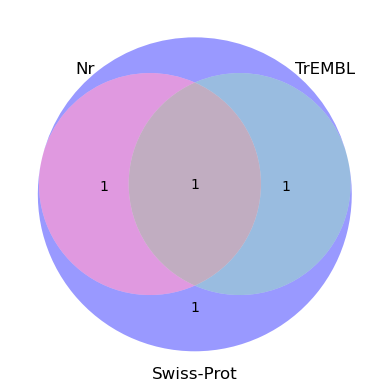

In [5]:
#Creat,save and plot the diagram
venn3(sets_list, databases_names)
plt.savefig('Databases_venn_diagram.png', bbox_inches = 'tight', dpi=300)
plt.show()